In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

## Loading Dataset

In [218]:
# https://goldberg.berkeley.edu/jester-data/
#First column is # of jokes from user, 

jester_1 = pd.read_excel("data/jester-data-1.xls")
jester_1

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24980,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [219]:
jester_1.columns
#Average Ranking for each joke?

Index([      74,    -7.82,     8.79,    -9.66,    -8.16,    -7.52,     -8.5,
          -9.85,     4.17,    -8.98,
       ...
       '2.82.2',  '99.18',  '99.19',  '99.20',  '99.21',  '99.22',    -5.63,
        '99.23',  '99.24',  '99.25'],
      dtype='object', length=101)

## Replacing '99' values with 0

In [220]:
#Replacing all instances of 99 with 0
jester_1 = jester_1.replace(to_replace = 99, value = 0)
jester_1

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
2,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39,0.00,0.00,0.00,0.00,-7.77,0.00,6.70,-6.75,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24980,37,0.00,0.00,0.00,0.00,-9.71,0.00,4.56,-8.30,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Correlation function to find the correlation between two users

In [221]:

def correlation(x, y):
    '''
    Returns the correlation between two entries, or users in the dataset
    '''

    #Gets rid of the first element
    x = x[1:]
    y = y[1:]

    x_av = np.mean(x)
    y_av = np.mean(y)

    #Centering
    x = x - x_av
    y = y - y_av

    return np.dot(x,y) / (LA.norm(x) * LA.norm(y))

In [222]:
first_user = jester_1.iloc[0]
second_user = jester_1.iloc[1]

print(correlation(first_user, second_user))

-0.21075829083938766


In [223]:
first_user = jester_1.iloc[0]
#print(first_user)
most_similar_user = [0, 0]

for i in range(1, len(jester_1)):
    row = jester_1.iloc[i]
    corr = correlation(first_user.to_numpy(), row.to_numpy())
    if (corr > most_similar_user[0]):
        most_similar_user[0] = corr
        most_similar_user[1] = i
    
print(most_similar_user)

[np.float64(0.4607285908126718), 6322]


In [224]:
#Going to guess what the second user is going to choose for the first joke

#print(second_user.to_numpy())
second_user = jester_1.iloc[1].to_numpy()
#second_user = second_user.to_numpy()

top_5_closest = np.zeros((5,2))

#Finds the most correlated users that have rated that joke
for i in range(0, len(jester_1)):
    if (i != 1):
        row = jester_1.iloc[i].to_numpy()
        if (row[1] != 0):
            corr = correlation(second_user, row)
            if corr > top_5_closest[0,0]:
                top_5_closest[0,0] = corr
                top_5_closest[0,1] = i
                
                top_5_closest = top_5_closest[top_5_closest[:, 0].argsort()]
    
print(top_5_closest)

#Joke rating
total_sim = 0
sim_score = 0
for i in range(top_5_closest.shape[0]):
    total_sim += top_5_closest[i, 0]
    #print(top_5_closest[i,1])
    print(jester_1.iloc[int(top_5_closest[i,1])].to_numpy()[1])
    sim_score += top_5_closest[i,0] * jester_1.iloc[int(top_5_closest[i,1])].to_numpy()[1]

print(f"Estimated score for joke 1 on user 2: {sim_score * (1/total_sim)}")

[[5.85594721e-01 2.43320000e+04]
 [5.89378637e-01 1.21670000e+04]
 [5.97102839e-01 1.29700000e+04]
 [5.98777994e-01 2.01730000e+04]
 [6.00037736e-01 1.47340000e+04]]
-0.24
1.21
-2.91
1.7
2.28
Estimated score for joke 1 on user 2: 0.4110027612524909


### Turning above ^^ Into a function that we can execute for any user and any joke

In [225]:
def calc_unknown(user_num, joke):
    '''
    Calculates the predicted value given a user # and joke #
    Will return nothing if a user has already rated the joke
    '''
    user = jester_1.iloc[user_num].to_numpy()

    #Only want jokes that a user has not already rated
    if (user[joke] == 0.0):

        top_5_closest = np.zeros((5,2))
        # Calculates top 5 closest users in terms of correlation that have 
        for i in range(0, len(jester_1)):
            if (i != user_num):
                row = jester_1.iloc[i].to_numpy()
                if (row[joke] != 0):
                    corr = correlation(user, row)
                    if corr > top_5_closest[0,0]:
                        top_5_closest[0,0] = corr
                        top_5_closest[0,1] = i
                        
                        top_5_closest = top_5_closest[top_5_closest[:, 0].argsort()]
        
        #print(top_5_closest)

        #Joke rating
        total_sim = 0
        sim_score = 0
       # print(top_5_closest.shape[0])

        for i in range(top_5_closest.shape[0]):
            total_sim += top_5_closest[i, 0]
            #print(top_5_closest[i,1])
            #print(jester_1.iloc[int(top_5_closest[i,1])].to_numpy()[1])
            sim_score += top_5_closest[i,0] * jester_1.iloc[int(top_5_closest[i,1])].to_numpy()[joke]

        #print(f"Estimated score for joke {joke} on user {user_num}: {sim_score * (1/total_sim)}")
        return sim_score * (1/total_sim)
    else:
        #print("User has already rated the joke!")
        return -1

In [226]:
calc_unknown(24981, 99)

np.float64(3.4936093590707413)

## Item-Item Method

In [227]:
jester_T = jester_1.T
jester_T
#jester_T.iloc[1].to_numpy()

,0,1,2,3,4,5,6,7,8,9,...,24972,24973,24974,24975,24976,24977,24978,24979,24980,24981
74,100.00,49.0,48.00,91.00,100.00,47.00,100.00,100.00,72.00,36.00,...,62.00,51.00,52.00,78.00,36.0,100.00,91.00,39.0,37.0,72.00
-7.82,4.08,0.0,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,-2.91,...,1.80,0.00,0.00,1.36,0.0,0.44,9.13,0.0,0.0,2.43
8.79,-0.29,0.0,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,4.08,...,-9.42,-9.22,8.20,1.75,0.0,7.43,-8.16,0.0,0.0,2.67
-9.66,6.36,0.0,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,0.00,...,-8.20,0.00,0.00,2.38,0.0,9.08,8.59,0.0,0.0,-3.98
-8.16,4.37,0.0,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,0.00,...,0.00,0.00,0.00,1.84,0.0,2.33,9.08,0.0,0.0,4.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.22,-2.14,0.0,0.00,1.55,-3.35,2.33,-3.35,-0.29,0.00,0.00,...,0.00,0.00,8.93,-0.34,0.0,9.03,-8.20,0.0,0.0,0.00
-5.63,3.06,0.0,0.00,3.11,0.05,0.00,2.14,-0.29,0.00,0.00,...,0.00,0.00,0.00,9.32,0.0,6.55,-7.23,0.0,0.0,0.00
99.23,0.34,0.0,0.00,6.55,-9.08,0.00,-0.05,-0.29,0.00,0.00,...,0.00,0.00,9.13,9.17,0.0,8.69,-8.59,0.0,0.0,0.00
99.24,-4.32,0.0,0.00,1.80,-5.05,0.00,1.31,-3.40,0.00,0.00,...,-3.74,0.00,0.00,8.88,0.0,8.79,9.13,0.0,0.0,0.00


In [228]:
def item_correlation(x,y):
    '''
    Returns the correlation between two items in the dataset
    '''

    x_av = np.mean(x)
    y_av = np.mean(y)

    #Centering
    x = x - x_av
    y = y - y_av

    return np.dot(x,y) / (LA.norm(x) * LA.norm(y))

In [229]:
#Going to try again, joke #1 for user 2

second_joke = jester_T.iloc[1].to_numpy()
#second_user = second_user.to_numpy()

top_3_closest = np.zeros((3,2))

for i in range(1, len(jester_T)):
    if (i != 2):
        row = jester_T.iloc[i].to_numpy()
        if (row[2] != 0.0):
            corr = item_correlation(second_joke, row)
            if corr > top_3_closest[0,0]:
                #print(f"Item {i} is good with correlation {corr}")


                top_3_closest[0,0] = corr
                top_3_closest[0,1] = i
                
                top_3_closest = top_3_closest[top_3_closest[:, 0].argsort()]
                #print(top_3_closest)
    
#print(top_3_closest)

#Joke rating
total_sim = 0
sim_score = 0
#Loop through the 3 jokes and their correlations
#Average the average value of the joke with the similarity

for i in range(top_3_closest.shape[0]):
    sim_score += top_3_closest[i,0] * second_joke[i]
    total_sim += top_3_closest[i,0]


print(f"Estimated score for joke 1: {sim_score * (1/total_sim)}")

Estimated score for joke 1: 1.2165211384492018


### Function time again

In [230]:
def calc_unknown_item(user_num, item_num):

    item = jester_T.iloc[item_num].to_numpy()

    if item[user_num] != 0.0:
        return -1

    top_3_closest = np.zeros((3,2))

    for i in range(1, len(jester_T)):
        if (i != item_num):
            row = jester_T.iloc[i].to_numpy()
            if (row[user_num] != 0.0):
                corr = item_correlation(item, row)
                if corr > top_3_closest[0,0]:
                    #print(f"Item {i} is good with correlation {corr}")
                    top_3_closest[0,0] = corr
                    top_3_closest[0,1] = i
                    
                    top_3_closest = top_3_closest[top_3_closest[:, 0].argsort()]
                    #print(top_3_closest)
        
    #print(top_3_closest)

    #Joke rating
    total_sim = 0
    sim_score = 0
    #Loop through the 3 jokes and their correlations
    #Average the average value of the joke with the similarity

    for i in range(top_3_closest.shape[0]):
        sim_score += top_3_closest[i,0] * item[i]
        total_sim += top_3_closest[i,0]

    #print(f"Estimated score for joke 1: {sim_score * (1/total_sim)}")
    return sim_score * (1/total_sim)

In [231]:
calc_unknown_item(24981, 99)

np.float64(-1.3990578756073075)

### Now to put everything to the test, we are going to calculate what joke we will recommend the most for User #2 using item-item

In [232]:
best_rated_joke = [0,0]
joke_ratings = []
indices = []

for i in range(99):
    predicted_score = calc_unknown_item(1, i)
    if (predicted_score != -1):
        if (predicted_score > best_rated_joke[0]):
            best_rated_joke[0] = predicted_score
            best_rated_joke[1] = i
        joke_ratings.append(predicted_score)
        indices.append(i)
print(f"Reccomended joke is joke #{best_rated_joke[1]}")

Reccomended joke is joke #34


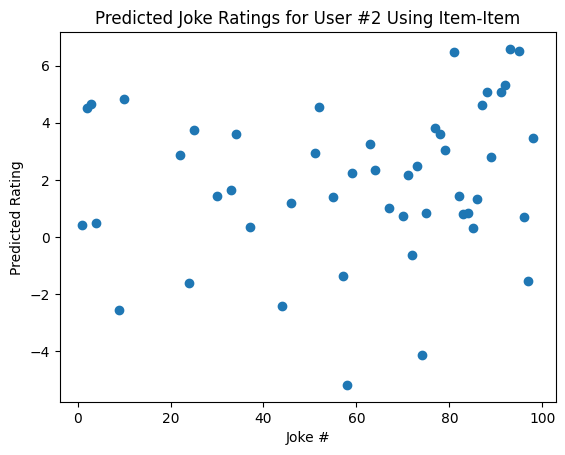

In [245]:
plt.scatter(indices,joke_ratings)
plt.title("Predicted Joke Ratings for User #2 Using Item-Item")
plt.xlabel("Joke #")
plt.ylabel("Predicted Rating")
plt.show()

In [237]:
best_rated_joke = [0,0]
joke_ratings = []
indices = []

for i in range(99):
    predicted_score = calc_unknown(1, i)
    if (predicted_score != -1):
        if (predicted_score > best_rated_joke[0]):
            best_rated_joke[0] = predicted_score
            best_rated_joke[1] = i
        joke_ratings.append(predicted_score)
        indices.append(i)
print(f"Reccomended joke is joke #{best_rated_joke[1]}")

Reccomended joke is joke #93


Text(0, 0.5, 'Predicted Score')

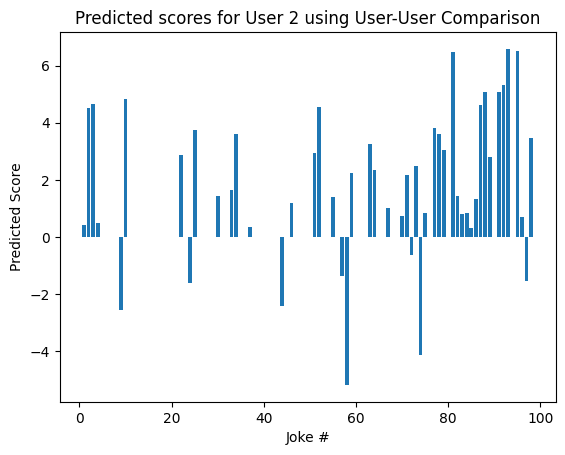

In [244]:
plt.bar(indices, joke_ratings)
plt.title("Predicted scores for User 2 using User-User Comparison")
plt.xlabel("Joke #")
plt.ylabel("Predicted Score")